# Loan_Prediction_Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df = pd.read_csv("C:\\Users\\Shreya Jadhav\\Documents\\CodeClause Internship Projects\\Loan Prediction\\loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.size

7982

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.fillna(method='ffill',inplace=True)

In [9]:
df.fillna(method='bfill',inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

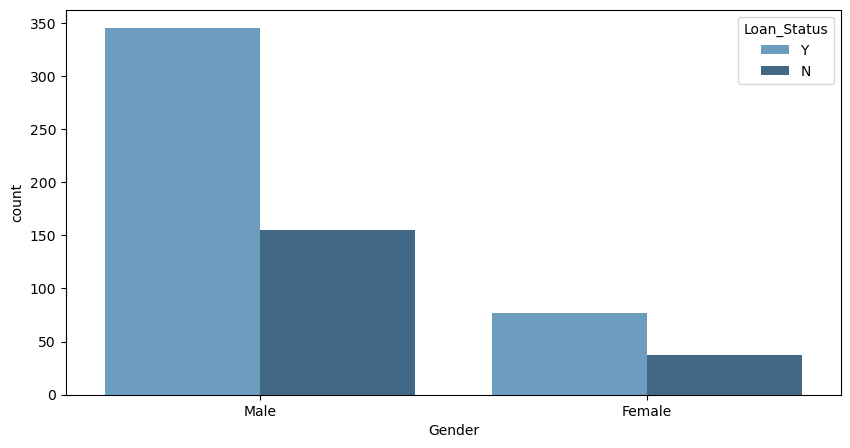

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Loan_Status',palette='Blues_d')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

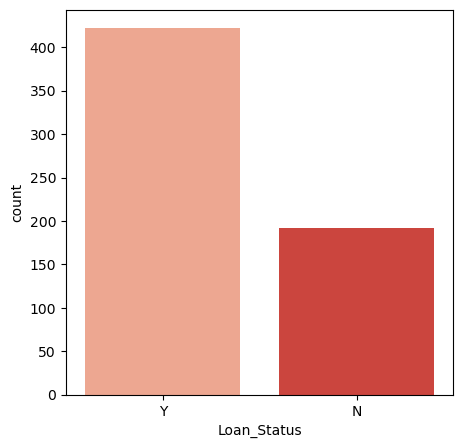

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=df,palette='Reds')

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

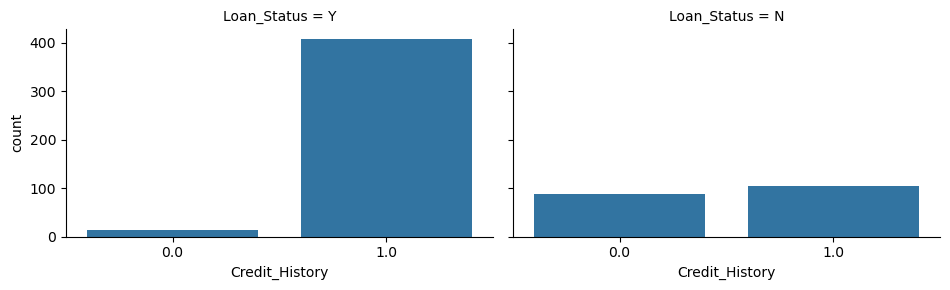

In [14]:
grid = sns.FacetGrid(df,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,"Credit_History")

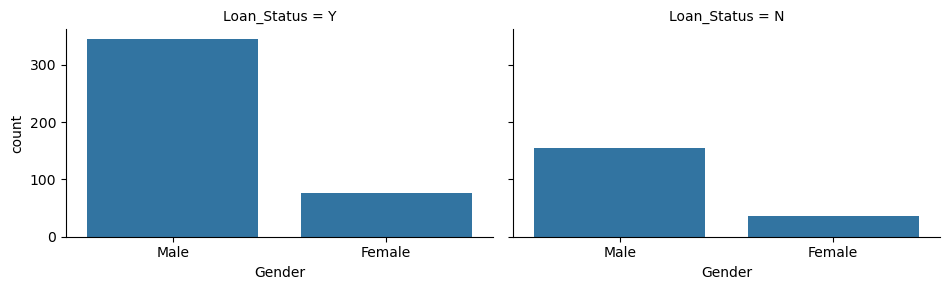

In [15]:
grid = sns.FacetGrid(df,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,"Gender")

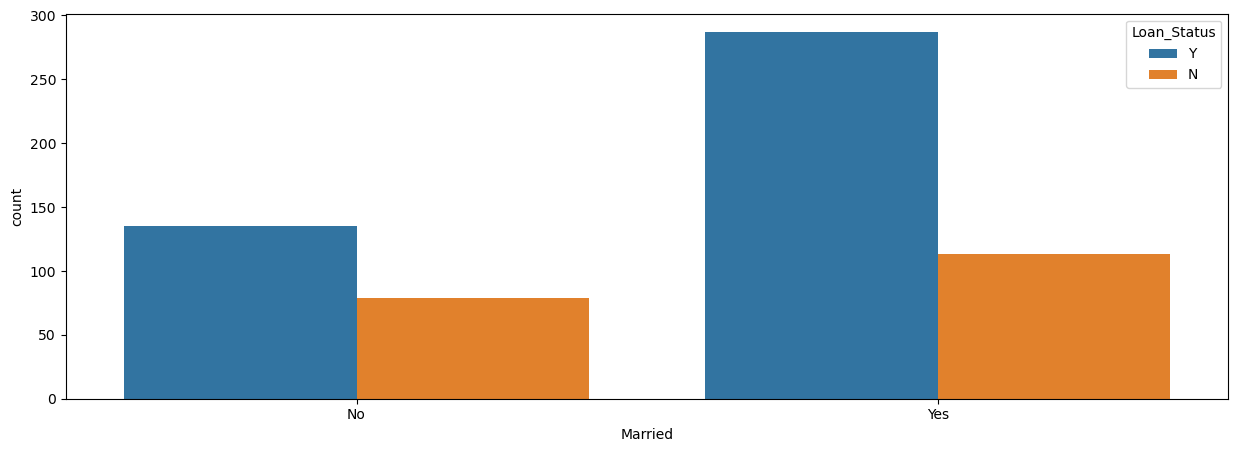

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Married',hue='Loan_Status',data=df);

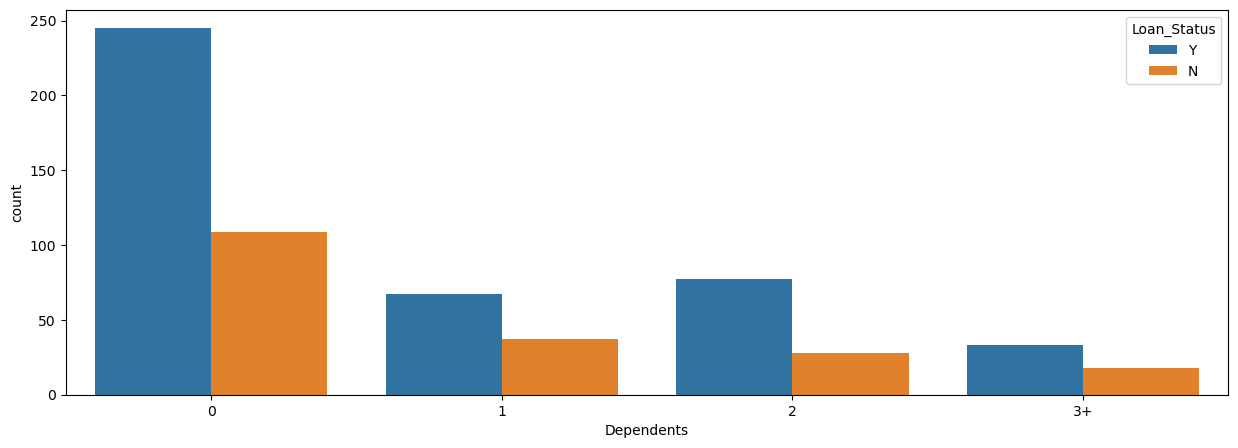

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents',hue='Loan_Status',data=df);

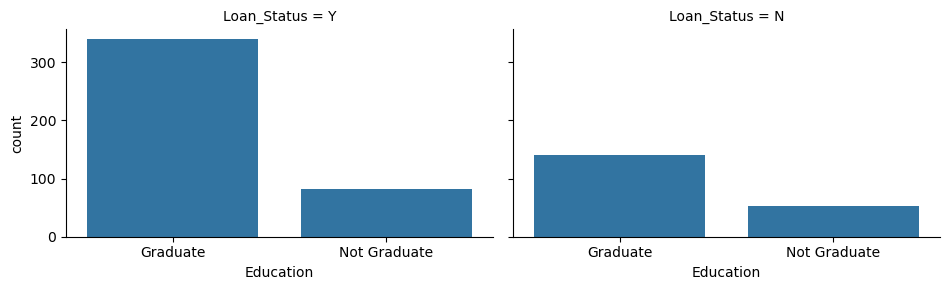

In [18]:
grid = sns.FacetGrid(df,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Education');

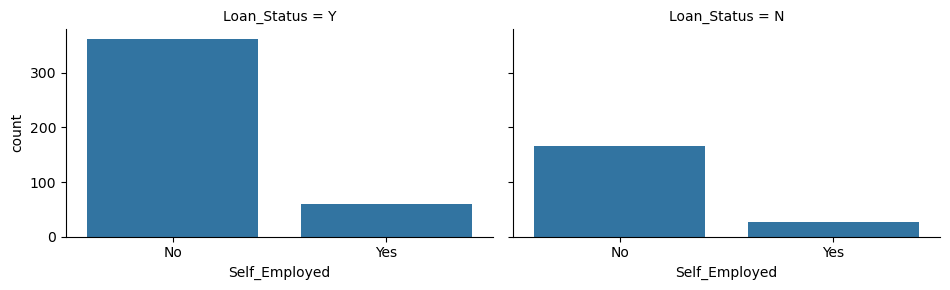

In [19]:
grid = sns.FacetGrid(df,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Self_Employed');

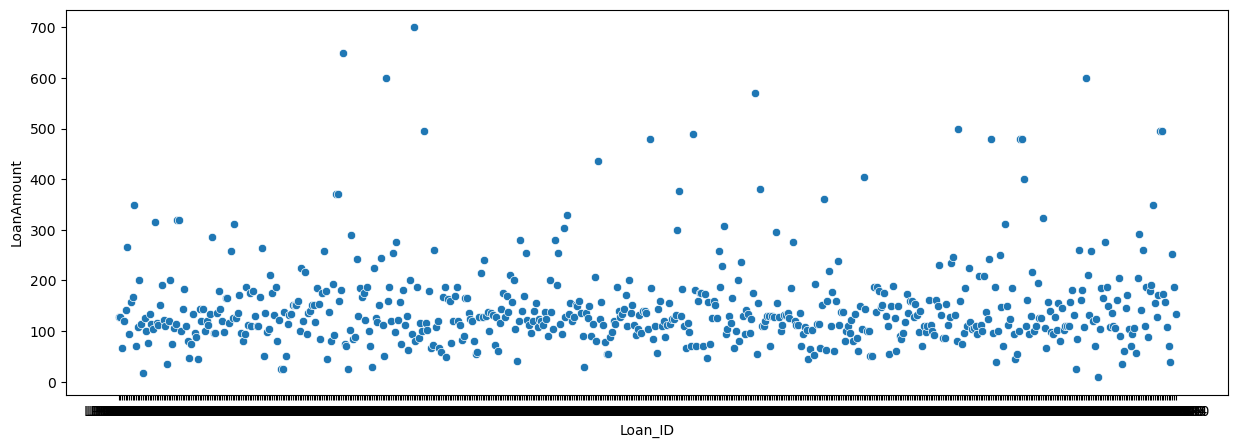

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Loan_ID',y='LoanAmount',data=df)
plt.show()

<Figure size 1000x500 with 0 Axes>

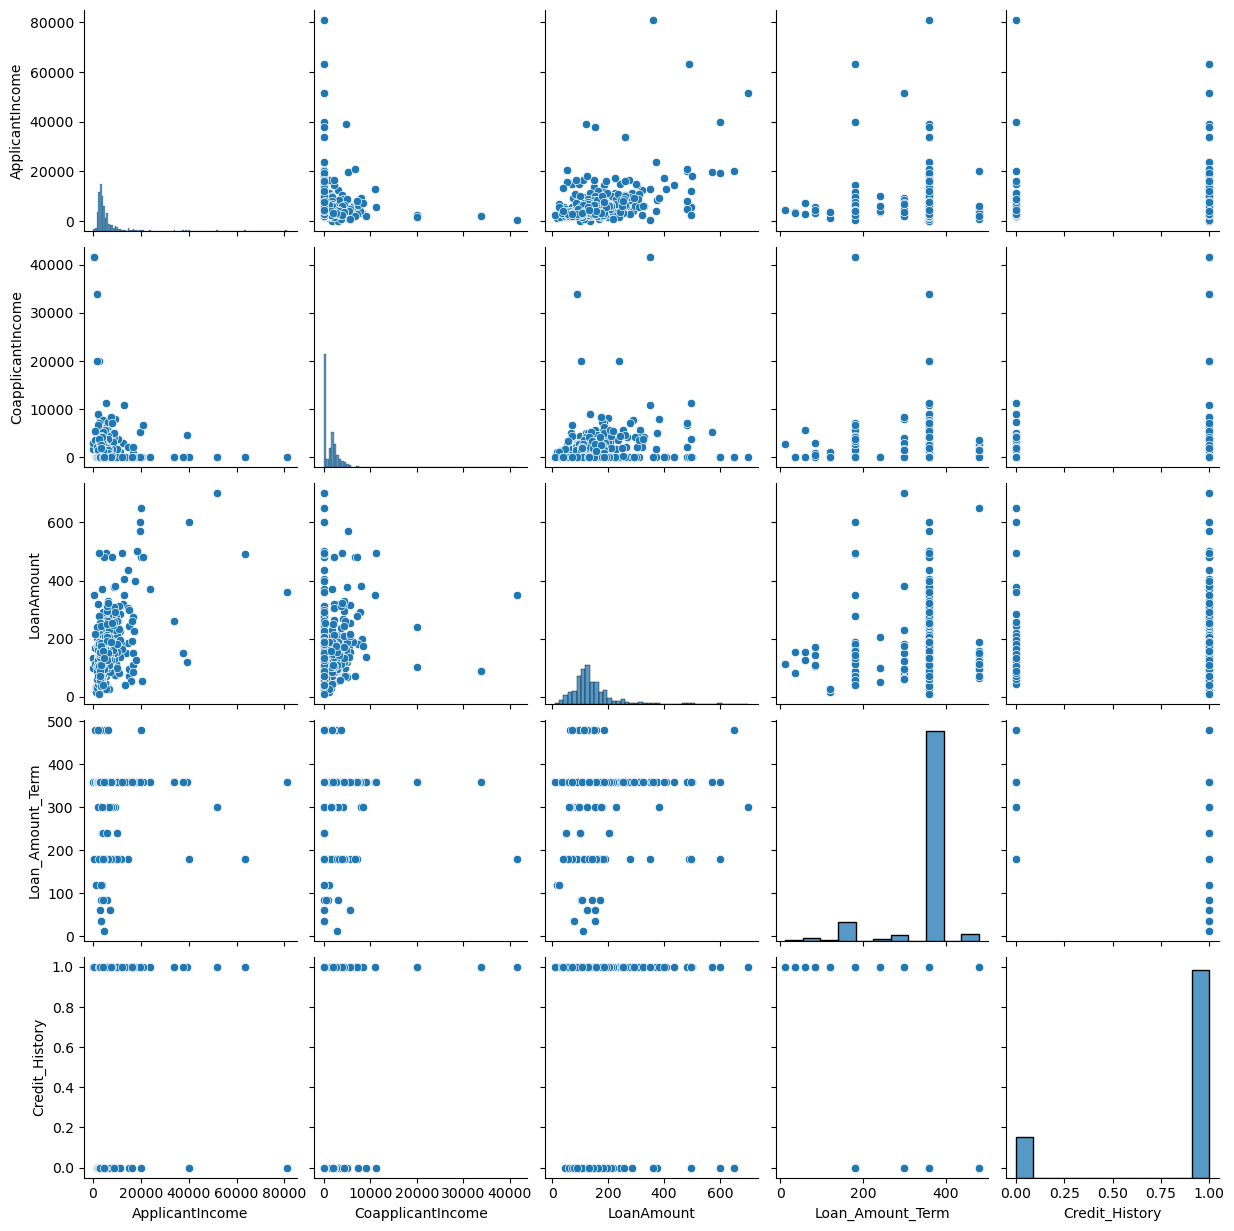

In [21]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

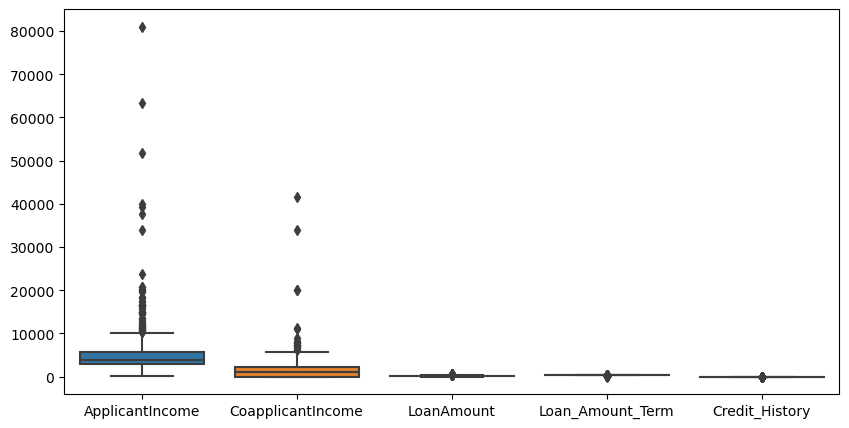

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [23]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,132.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


In [24]:
df.drop('Dependents',axis=1,inplace=True)
df.drop('ApplicantIncome',axis=1,inplace=True)
df.drop('CoapplicantIncome',axis=1,inplace=True)
df.drop('LoanAmount',axis=1,inplace=True)
df.drop('Loan_Amount_Term',axis=1,inplace=True)
df.drop('Credit_History',axis=1,inplace=True)

In [25]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [26]:
df1 = pd.get_dummies(df,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
df1.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1


In [27]:
df1.drop('Married_No',axis=1,inplace=True)
df1.drop('Education_Graduate',axis=1,inplace=True)
df1.drop('Self_Employed_No',axis=1,inplace=True)
df1.drop('Property_Area_Rural',axis=1,inplace=True)
df1.drop('Loan_Status_N',axis=1,inplace=True)

In [28]:
df1.head()

,Loan_ID,Gender_Female,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0,1,0,0,0,0,1,1
1,LP001003,0,1,1,0,0,0,0,0
2,LP001005,0,1,1,0,1,0,1,1
3,LP001006,0,1,1,1,0,0,1,1
4,LP001008,0,1,0,0,0,0,1,1


In [29]:
X = df1[['Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']].values
y=df1['Loan_Status_Y'].values

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(xtrain,ytrain)
yp1 = m1.predict(xtest)

from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier()
m2.fit(xtrain,ytrain)
yp2 = m2.predict(xtest)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression: ")
print("Accuracy is ", accuracy_score(ytest,yp1))
print("Precision score is ", precision_score(ytest,yp1))
print("Recall is ", recall_score(ytest,yp1))
print("classification report is ", classification_report(ytest,yp1))
print("Confusion matrix is ", confusion_matrix(ytest,yp1))

Logistic Regression: 
Accuracy is  0.7317073170731707
Precision score is  0.7355371900826446
Recall is  0.9888888888888889
classification report is                precision    recall  f1-score   support

           0       0.50      0.03      0.06        33
           1       0.74      0.99      0.84        90

    accuracy                           0.73       123
   macro avg       0.62      0.51      0.45       123
weighted avg       0.67      0.73      0.63       123

Confusion matrix is  [[ 1 32]
 [ 1 89]]


In [32]:
print("Decision Tree Classifier: ")
print("Accuracy is ", accuracy_score(ytest,yp2))
print("Precision score is ", precision_score(ytest,yp2))
print("Recall is ", recall_score(ytest,yp2))
print("Classification report is ", classification_report(ytest,yp2))
print("Confision matrix is ", confusion_matrix(ytest,yp2))

Decision Tree Classifier: 
Accuracy is  0.7154471544715447
Precision score is  0.7433628318584071
Recall is  0.9333333333333333
Classification report is                precision    recall  f1-score   support

           0       0.40      0.12      0.19        33
           1       0.74      0.93      0.83        90

    accuracy                           0.72       123
   macro avg       0.57      0.53      0.51       123
weighted avg       0.65      0.72      0.66       123

Confision matrix is  [[ 4 29]
 [ 6 84]]


In [33]:
print("Logistic Regression: ")
print("Accuracy is ", accuracy_score (ytest,yp1))
print("Precision score is ", precision_score (ytest,yp1))
print("Recall is ",recall_score (ytest,yp1))
print("_________________________________________________________________________________________________________________________")
print("Decision Tree Classifier: ")
print("Accuracy is ", accuracy_score (ytest,yp2))
print("Precision score is ", precision_score (ytest,yp2))
print("Recall is ",recall_score (ytest,yp2))

Logistic Regression: 
Accuracy is  0.7317073170731707
Precision score is  0.7355371900826446
Recall is  0.9888888888888889
_________________________________________________________________________________________________________________________
Decision Tree Classifier: 
Accuracy is  0.7154471544715447
Precision score is  0.7433628318584071
Recall is  0.9333333333333333


In [34]:
print("Logistic Regression Predictions ",yp1)
print("_________________________________________________________________________________________________________________________")
print("Decision Tree predictions ",yp2)

Logistic Regression Predictions  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
_________________________________________________________________________________________________________________________
Decision Tree predictions  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
print("For Logistic Regression :")
print("Accuracy is ", accuracy_score (ytest,yp1))
print("_________________________________________________________________________________________________________________________")
print("For Decision tree :")
print("Accuracy is ", accuracy_score(ytest,yp2))

For Logistic Regression :
Accuracy is  0.7317073170731707
_________________________________________________________________________________________________________________________
For Decision tree :
Accuracy is  0.7154471544715447
